In [1]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/selectedtopics/tut2`


## Youbot Arm

### 3.1

In [2]:
using Dojo
using DojoEnvironments
using Plots
using LinearAlgebra
using ForwardDiff: jacobian

urdf = :youbot_arm_only_fixed_gripper
arm = get_mechanism(:youbot; urdf, gravity=0, joint_limits=Dict(), timestep=0.001)

initialize!(arm, :youbot; arm_angles=[0.1;0.2;-0.3;-0.4;0.5])

storage = simulate!(arm, 5.0, record = true)
vis = visualize(arm, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8705, thread id: 1
└ @ HTTP.Servers /home/victor/.julia/packages/HTTP/sJD5V/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8705
└ @ MeshCat /home/victor/.julia/packages/MeshCat/0RCA3/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("arm_link_2__id_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x32, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_1__id_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x31, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x33], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_5__id_5" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x

### 3.2 fix arm in place 

In [3]:
qdes = [pi/2;-pi/4;-pi/2;pi/2;0.0]

function controller!(mechanism, k)
    state = get_minimal_state(mechanism)
    q = state[1:2:9]
    dq = state[2:2:10]

    Kp = 300.0
    Kd = 20.0
    
    u = Kp*(qdes - q) + Kd*(0 .- dq)

    set_input!(mechanism, u)
end

arm.gravity = [0;0;-9.81]

initialize!(arm, :youbot; arm_angles=qdes)

storage = Storage(5000,5)
storage = simulate!(arm, 1:5000, storage, controller!, record = true)
vis = visualize(arm, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8706, thread id: 1
└ @ HTTP.Servers /home/victor/.julia/packages/HTTP/sJD5V/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8706
└ @ MeshCat /home/victor/.julia/packages/MeshCat/0RCA3/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("arm_link_2__id_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x32, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_1__id_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x31, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x33], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_5__id_5" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x

### 3.3 follow trajectory 


In [4]:
q1des = [pi/2*(i-1)/5000 for i=1:5000]
q2des = [-pi/4*(i-1)/5000 for i=1:5000]
q3des = [-pi/2*(i-1)/5000 for i=1:5000]
q4des = [pi/2*(i-1)/5000 for i=1:5000]
q5des = [0.0 for i=1:5000]

function controller!(mechanism, k)
    state = get_minimal_state(mechanism)
    q = state[1:2:9]
    dq = state[2:2:10]

    Kp = 30.0
    Kd = 2.0
    
    u1 = Kp*(q1des[k] - q[1]) + Kd*(0-dq[1])
    u2 = Kp*(q2des[k] - q[2]) + Kd*(0-dq[2])
    u3 = Kp*(q3des[k] - q[3]) + Kd*(0-dq[3])
    u4 = Kp*(q4des[k] - q[4]) + Kd*(0-dq[4])
    u5 = Kp*(q5des[k] - q[5]) + Kd*(0-dq[5])

    set_input!(mechanism, [u1;u2;u3;u4;u5])
end

arm.gravity = [0;0;-9.81]

initialize!(arm, :youbot; arm_angles=[0;0;0;0;0])

storage = Storage(5000,5)
storage = simulate!(arm, 1:5000, storage, controller!, record = true)
vis = visualize(arm, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8707, thread id: 1
└ @ HTTP.Servers /home/victor/.julia/packages/HTTP/sJD5V/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8707
└ @ MeshCat /home/victor/.julia/packages/MeshCat/0RCA3/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("arm_link_2__id_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x32, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_1__id_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x31, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x33], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_5__id_5" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x

### 3.4

In [5]:
qdes = [pi/2;-pi/4;-pi/2;pi/2;0.0]

T01(θ) = [
    Dojo.rotation_matrix(Dojo.RotZ(-θ)) [0;0;0.128]
    0 0 0 1
]

T12(θ) = [
    Dojo.rotation_matrix(Dojo.RotY(θ)) [0.033;0;0.019]
    0 0 0 1
]

T23(θ) = [
    Dojo.rotation_matrix(Dojo.RotY(θ)) [0;0;0.155]
    0 0 0 1
]

T34(θ) = [
    Dojo.rotation_matrix(Dojo.RotY(θ)) [0;0;0.135]
    0 0 0 1
]

T45(θ) = [
    Dojo.rotation_matrix(Dojo.RotZ(-θ)) [-0.002;0;0.130]
    0 0 0 1
]

T5ef() = [
    I(3) [0.004;-0.008-0.001;0.046]
    0 0 0 1
]

fkin(q) = (T01(q[1])*T12(q[2])*T23(q[3])*T34(q[4])*T45(q[5])*T5ef()*[0;0;0;1])[1:3]

function newton_ls(f,x0;ε=1e-8)
    x1 = x0

    for n=1:100
        # Function evaluation and gradient
        f0 = f(x0)
        nf0 = norm(f0)
        G = jacobian(f,x0)

        # Update calculation (x̂ = x0 - x1)
        x̂1 = G\f0

        # Newton update with line search
        x1 = x0 - x̂1
        norm(f(x1))>nf0 ? x1 = linesearch(f,x0,nf0,-x̂1) : nothing
        norm(x1-x0)<ε ? (return x1, n) : x0 = x1
    end

    return x1, -1
end

function linesearch(f,x0,nf0,d)
    α = 1
    x1 = x0 + 1/(2^α)*d

    for n=1:10
        norm(f(x1)) < nf0 ? (return x1) : x1 = x0 + 1/(2^α)*d
        α += 1
    end

    return x1
end;

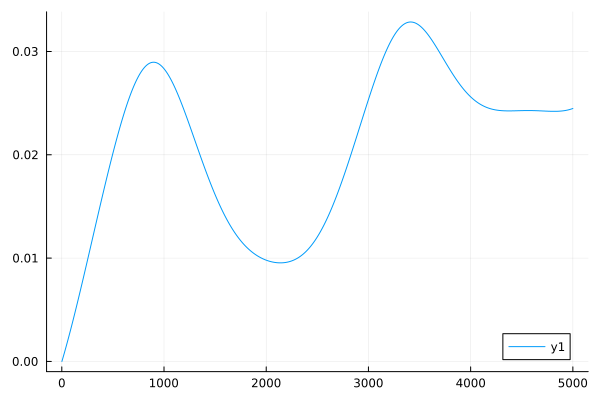

In [6]:
xcurrent = fkin(qdes)

xtraj = [xcurrent + [0.1-0.1*cos(i*2pi/2500);0;0.1*sin(i*2pi/2500)] for i=0:5000]

q1des = zeros(5000)
q2des = zeros(5000)
q3des = zeros(5000)
q4des = zeros(5000)
q5des = zeros(5000)

q1des[1] = qdes[1]
q2des[1] = qdes[2]
q3des[1] = qdes[3]
q4des[1] = qdes[4]
q5des[1] = qdes[5]

for i=2:5000
    q1des[i], q2des[i], q3des[i], q4des[i], q5des[i] = newton_ls(q->fkin(q)-xtraj[i],[q1des[i-1];q2des[i-1];q3des[i-1];q4des[i-1];q5des[i-1]])[1]
end

plot(q5des)

In [7]:
function controller!(mechanism, k)
    state = get_minimal_state(mechanism)
    q = state[1:2:9]
    dq = state[2:2:10]

    Kp = 30.0
    Kd = 2.0
    
    u1 = Kp*(q1des[k] - q[1]) + Kd*(0-dq[1])
    u2 = Kp*(q2des[k] - q[2]) + Kd*(0-dq[2])
    u3 = Kp*(q3des[k] - q[3]) + Kd*(0-dq[3])
    u4 = Kp*(q4des[k] - q[4]) + Kd*(0-dq[4])
    u5 = Kp*(q5des[k] - q[5]) + Kd*(0-dq[5])

    set_input!(mechanism, [u1;u2;u3;u4;u5])
end

arm.gravity = [0;0;-9.81]

initialize!(arm, :youbot; arm_angles=qdes)

storage = Storage(5000,5)
storage = simulate!(arm, 1:5000, storage, controller!, record = true)
vis = visualize(arm, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8708, thread id: 1
└ @ HTTP.Servers /home/victor/.julia/packages/HTTP/sJD5V/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8708
└ @ MeshCat /home/victor/.julia/packages/MeshCat/0RCA3/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("arm_link_2__id_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x32, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_1__id_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x31, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x33], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_5__id_5" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x

In [8]:
xcurrent = fkin(qdes)

xtraj = [xcurrent + [0.1-0.1*cos(i*2pi/2500);0;0.1*sin(i*2pi/2500)] for i=0:5000]
dxtraj = [(xtraj[i+1]-xtraj[i])/0.001 for i=1:5000]

qdestraj = [zeros(5) for i=1:5000]
qdestraj[1] = qdes

dq1des = zeros(5000)
dq2des = zeros(5000)
dq3des = zeros(5000)
dq4des = zeros(5000)
dq5des = zeros(5000)

dq1des[1], dq2des[1], dq3des[1], dq4des[1], dq5des[1] = pinv(jacobian(fkin,qdestraj[1]))*dxtraj[1]

for i=2:5000
    qdestraj[i] = qdestraj[i-1] + [dq1des[i-1];dq2des[i-1];dq3des[i-1];dq4des[i-1];dq5des[i-1]]*0.001
    dq1des[i], dq2des[i], dq3des[i], dq4des[i], dq5des[i] = jacobian(fkin,qdestraj[i])\dxtraj[i]
    
end

function controller!(mechanism, k)
    state = get_minimal_state(mechanism)
    q = state[1:2:9]
    dq = state[2:2:10]

    Kp = 30.0
    Kd = 2.0

    u1 = Kp*(qdestraj[k][1]-q[1]) + Kd*(dq1des[k]-dq[1])
    u2 = Kp*(qdestraj[k][2]-q[2]) + Kd*(dq2des[k]-dq[2])
    u3 = Kp*(qdestraj[k][3]-q[3]) + Kd*(dq3des[k]-dq[3])
    u4 = Kp*(qdestraj[k][4]-q[4]) + Kd*(dq4des[k]-dq[4])
    u5 = Kp*(qdestraj[k][5]-q[5]) + Kd*(dq5des[k]-dq[5])

    set_input!(mechanism, [u1;u2;u3;u4;u5])
end

arm.gravity = [0;0;-9.81]

initialize!(arm, :youbot; arm_angles=qdes)

storage = Storage(5000,5)
storage = simulate!(arm, 1:5000, storage, controller!, record = true)
vis = visualize(arm, storage)
render(vis)

┌ Info: Listening on: 127.0.0.1:8709, thread id: 1
└ @ HTTP.Servers /home/victor/.julia/packages/HTTP/sJD5V/src/Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8709
└ @ MeshCat /home/victor/.julia/packages/MeshCat/0RCA3/src/visualizer.jl:64


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("Background" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("top_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64], "bottom_color" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x42, 0x61, 0x63, 0x6b, 0x67, 0x72, 0x6f, 0x75, 0x6e, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "Grid" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}("visible" => [0x84, 0xa8, 0x70, 0x72, 0x6f, 0x70, 0x65, 0x72, 0x74, 0x79  …  0x70, 0x61, 0x74, 0x68, 0xa5, 0x2f, 0x47, 0x72, 0x69, 0x64]), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("floor" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x66, 0x6c, 0x6f, 0x6f, 0x72], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("bodies" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("arm_link_2__id_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x32, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x32], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_1__id_3" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6e, 0x6b, 0x5f, 0x31, 0x5f, 0x5f, 0x69, 0x64, 0x5f, 0x33], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "arm_link_5__id_5" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x64, 0x5f, 0x35, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "shape1" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x31], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("shape2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x70, 0x65, 0x31, 0x2f, 0x73, 0x68, 0x61, 0x70, 0x65, 0x